<a href="https://colab.research.google.com/github/Valiturbide/PROYECTO/blob/main/PROYECT03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

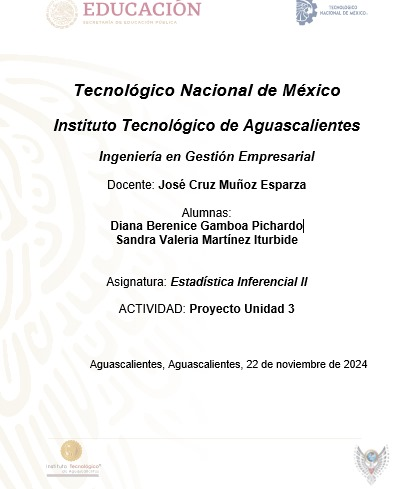

# *INTRODUCCIÓN:*#


El presente trabajo tiene como objetivo analizar la relación entre las series de tiempo de dos importantes empresas: Coca-Cola Company (KO) y Coca-Cola FEMSA (KOF), cuyos datos fueron descargados de la plataforma Yahoo Finance. Las fechas seleccionadas para este análisis abarcan desde el 01 de Enero de 2015 hasta el 01 de Enero del 2018. Este análisis busca explorar y validar la hipótesis de que ambas marcas presentan una relación significativa debido a su vinculación dentro del mismo sector y cadena de valor.

El desarrollo del proyecto se estructura en varias etapas:

Análisis independiente de las series de tiempo: Se llevará a cabo un estudio detallado de cada serie utilizando técnicas estadísticas y herramientas aprendidas durante el examen de práctica, para identificar patrones, tendencias y componentes estacionales.

Causalidad de Granger: Se investigará este concepto para determinar si los movimientos de una serie de tiempo pueden prever los de la otra, evaluando la dirección y magnitud de su relación.

Aplicación del modelo Prophet: Se examinarán los alcances y limitaciones de esta herramienta de predicción, aplicándola a ambas series para proyectar su comportamiento y analizar las posibles conexiones.

# **MARCO TEÓRICO:**

El análisis de series de tiempo es una herramienta fundamental en finanzas y economía, que permite examinar datos dependientes del tiempo para identificar patrones y relaciones. En nuestro caso que estamos con COCA-COLA Y FEMSA, las series de tiempo ayudan a analizar ventas, producción o bien el precio de las acciones

**Causalidad de granger:**
>La causalidad de Granger es un test estadistíco que busca comprobar si los resultados de una variable sirven para predecir la otra variable. Esta causalidad ayuda a saber si las estrategias o las ventas que tenga FEMSA pueda afectar o mostrar influencia en los indicadores financieros de Coca-Cola

**Series de tiempo:**

>Podemos decir que las series de tiempo se define como una secuencia de datos observados en un intervalo de tiempo y ordenado cronólogicamente. Se hacen para ver la evolución de los datos a tráves del tiempo.

**Modelo prophet:**
>Es un modelo de regresión aditiva con una tendencia de curva de crecimiento lineal o logística por partes. Incluye un componente estacional anual modelado usando series de Fourier y un componente estacional semanal modelado usando variables ficticias. Este modelo ayuda en este proyecto modelando las variaciones estacionales y los picos de consumos que tenga FEMSA Y Coca-Cola

**Transformada de Fourier**
>Se puede decir que la transformada de Fourier es un modelo matemático que nos permite transformar las señales entre dos dominios diferentes o en otras palabras descompone una serie de tiempo en sus componentes de frecuencia  . En este proyecto aporta

**Prueba de Dickey-Fuller**
>Es una prueba estadística que nos ayuda a verificar si una serie de tiempo es estacionaria o no, en otras palabras esto significa que nos dice si sus propiedades estadísticas como su varianza, la media y autocorrelación son constantes en el tiempo. En este caso se aborda este tema porque puede ayudarnos a saber si las series implementadas necesitan ser transformadas para su mejor interpretación y poder aplicar la causalidad de Granger o el modelo ARIMA

a) Selecciona dos marcas sobre las cuales tengas la hipótesis que están relacionadas entre sí.

#*HIPÓTESIS:*#
> La empresa *Coca-Cola*(KO) y *FEMSA* (KOF) tienen una relación ampliamente directa, ya que KOF es la embotelladroa de KO, basandonos en ese suceso podemos decir que entre mayor producción tenga *Coca-Cola* de igual manera la tendrá *FEMSA*

b) Realiza un análisis de cada serie de tiempo de manera independiente

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

warnings.filterwarnings("ignore")
df=yf.download(
    tickers=["KO","KOF"],
   start="2015-01-01",
   end="2018-01-01",
   interval="1d",
group_by=None,
    auto_adjust=False,
    actions=False)
# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]
df
###################################################################################################
#En caso de que no se requiera la hora
#Convertir la columna "Date" a tipo detetime si no lo es ya
df["Date"]=pd.to_datetime(df["Date"])
df["Date"]=df["Date"].dt.date
df.set_index("Date",inplace=True)
df

[*********************100%***********************]  2 of 2 completed


,KOF_Open,KOF_High,KOF_Low,KOF_Close,KOF_Adj Close,KOF_Volume,KO_Open,KO_High,KO_Low,KO_Close,KO_Adj Close,KO_Volume
Date,,,,,,,,,,,,
2015-01-02,86.449997,86.449997,85.160004,85.459999,61.184826,83900,42.259998,42.400002,41.799999,42.139999,30.894678,9921100
2015-01-05,85.120003,85.449997,83.019997,84.389999,60.418755,56100,42.689999,42.970001,42.080002,42.139999,30.894678,26292600
2015-01-06,84.690002,86.540001,84.129997,85.870003,61.478352,64200,42.410000,42.939999,42.240002,42.459999,31.129276,16897500
2015-01-07,86.839996,87.669998,85.070000,86.580002,61.986706,61500,42.799999,43.110001,42.580002,42.990002,31.517839,13412300
2015-01-08,87.519997,88.620003,87.169998,87.639999,62.745598,45100,43.180000,43.570000,43.099998,43.509998,31.899076,21743600
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,69.410004,69.589996,67.400002,67.959999,52.394833,66100,45.689999,45.730000,45.549999,45.590000,36.857445,5406300
2017-12-26,68.139999,69.589996,66.580002,67.959999,52.394833,77100,45.700001,45.860001,45.610001,45.810001,37.035309,6100400
2017-12-27,68.250000,68.370003,67.510002,68.050003,52.464226,52100,45.900002,45.939999,45.720001,45.930000,37.132324,5660600


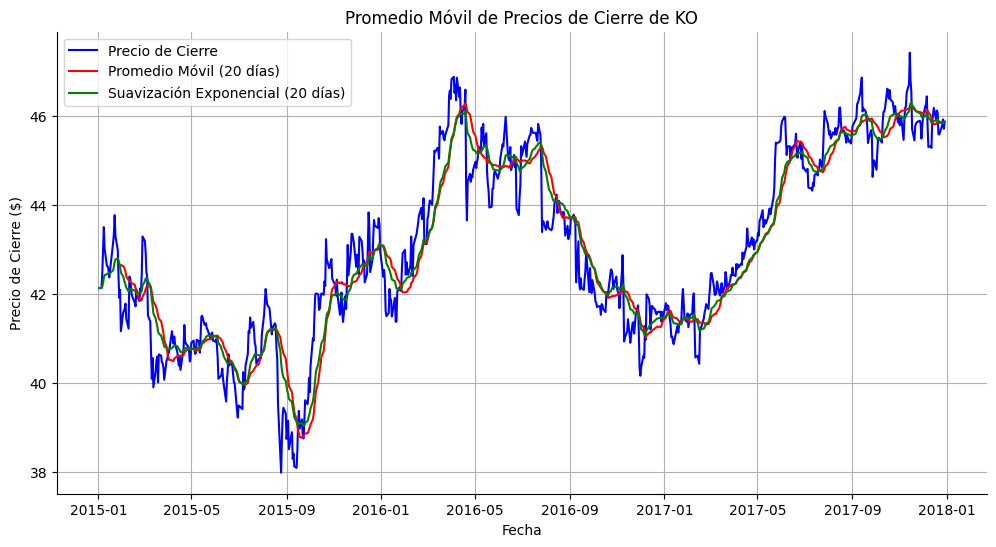

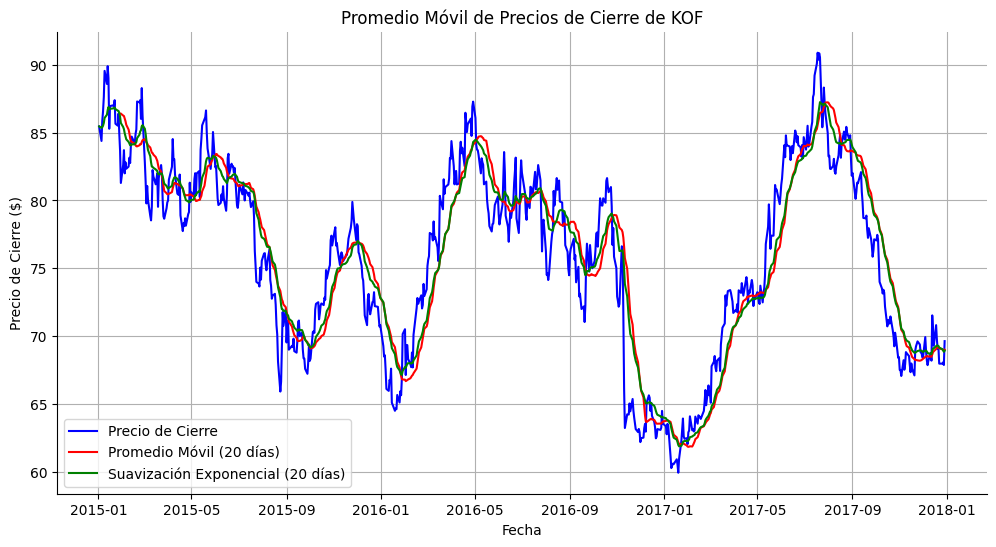

In [ ]:
import matplotlib.pyplot as plt
# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['KO_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 20
df['SES'] = df['KO_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['KO_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='red')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de KO')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


import matplotlib.pyplot as plt
# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['KOF_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 20
df['SES'] = df['KOF_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['KOF_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='red')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de KOF')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

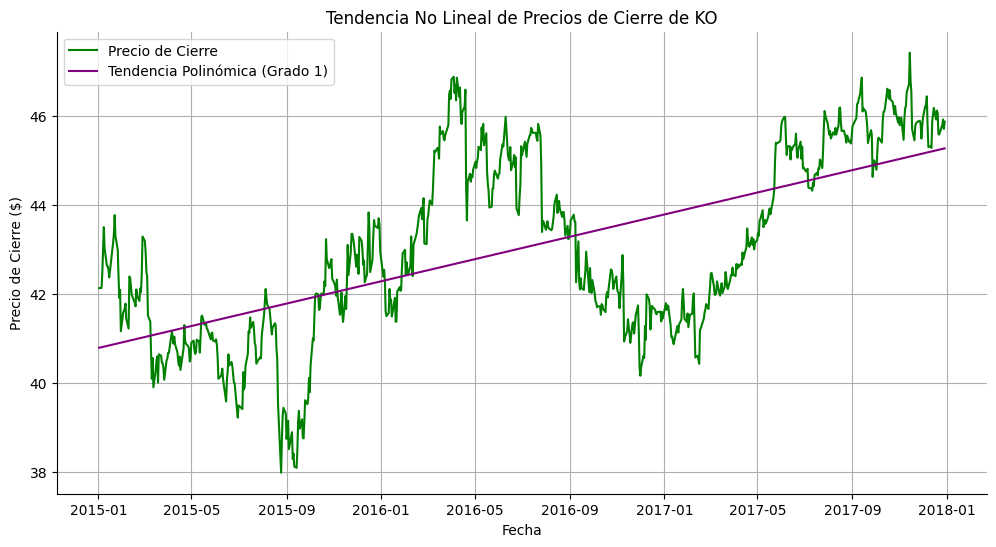

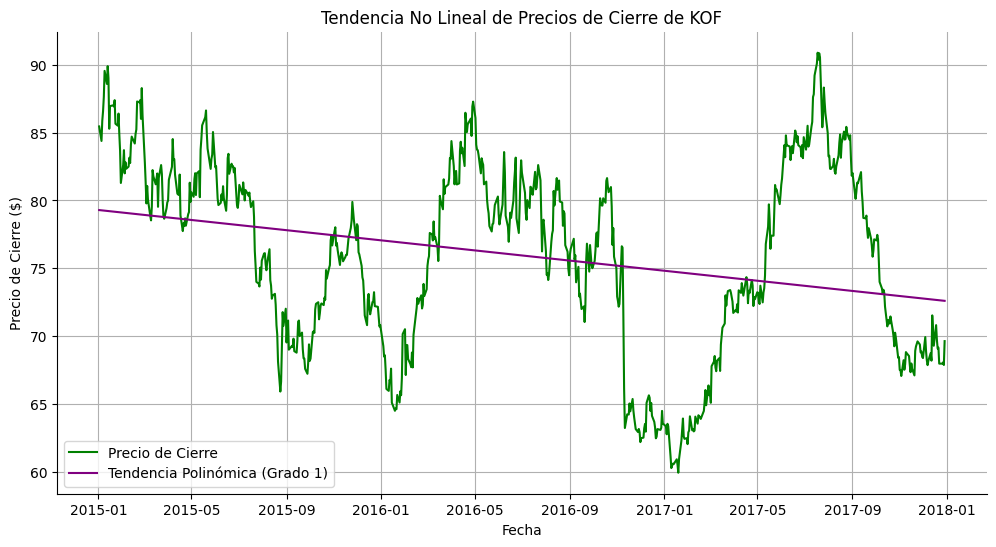

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['KO_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 1
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid_KO'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de KO') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)



from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['KOF_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 1
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid_KOF'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de KOF') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)


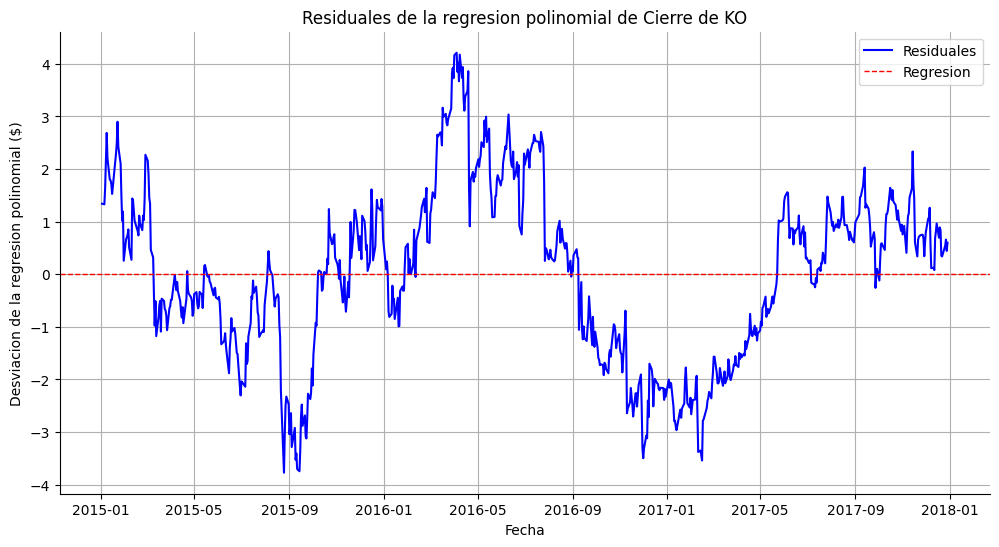

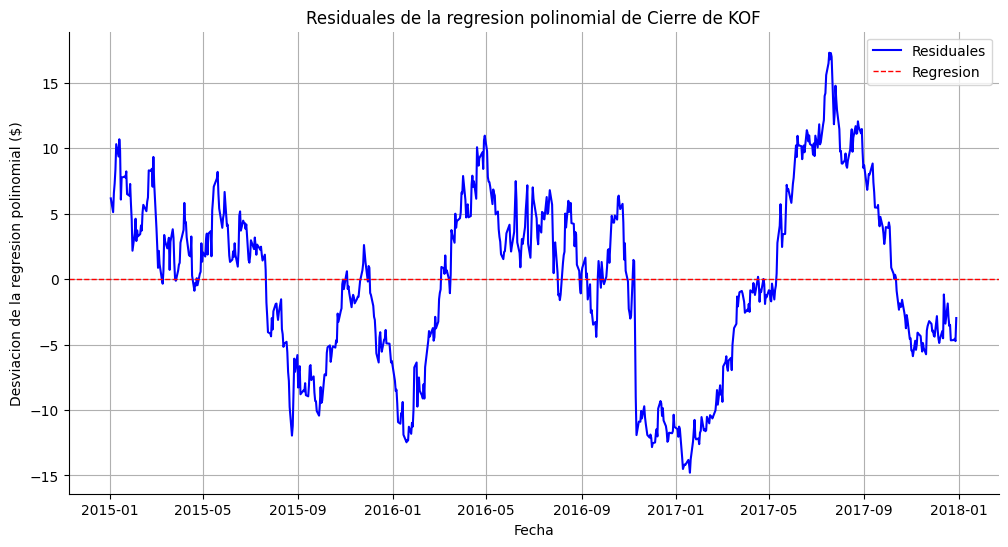

In [ ]:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid_KO'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de KO')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid_KOF'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de KOF')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia    magnitud  longitud_de_onda
0    0.002649  714.370237        377.500000
1    0.003974  186.504401        251.666667
2    0.001325  162.643643        755.000000
3    0.010596  158.202635         94.375000
4    0.017219  121.138420         58.076923


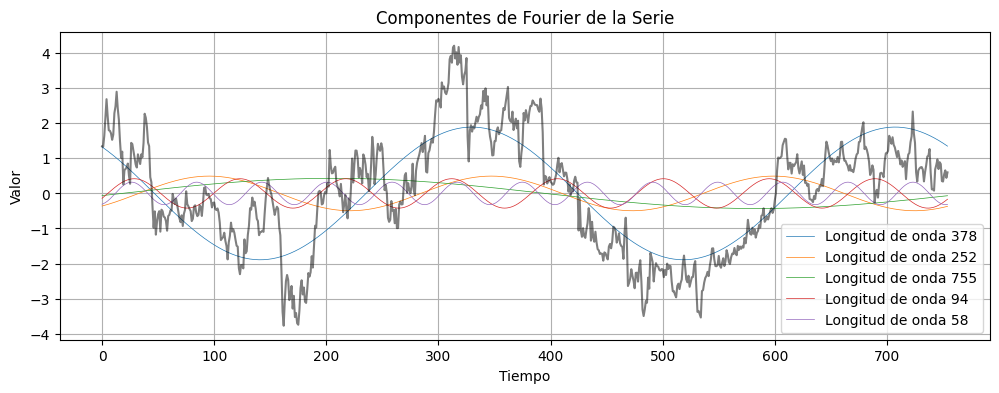

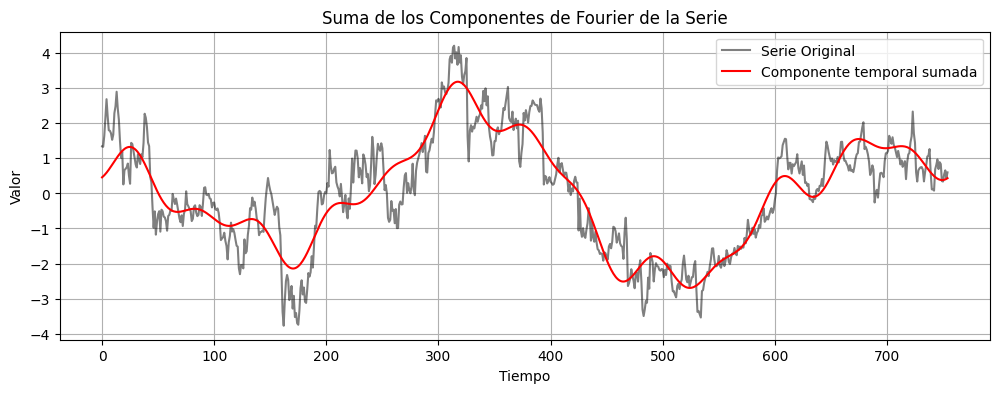

In [ ]:
serie = df['Poly_Resid_KO'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado

In [ ]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.003974  2131.758829        251.666667
1    0.002649  1654.995459        377.500000
2    0.009272  1201.230161        107.857143
3    0.005298  1060.801114        188.750000
4    0.001325   876.142357        755.000000


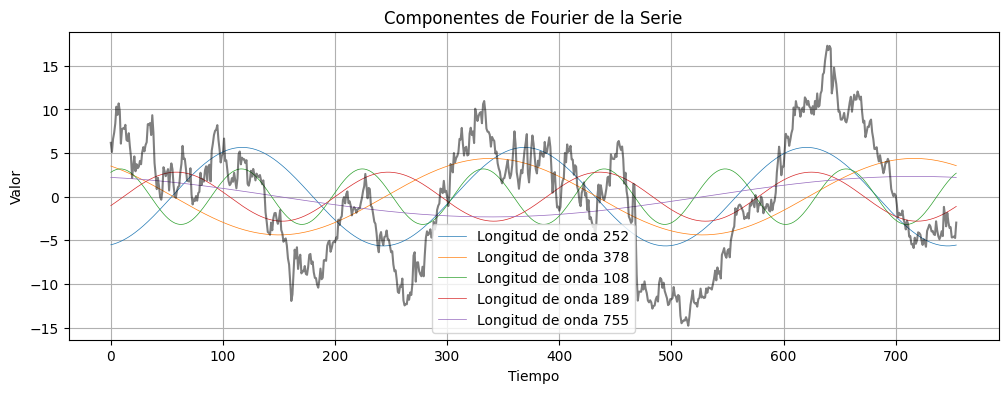

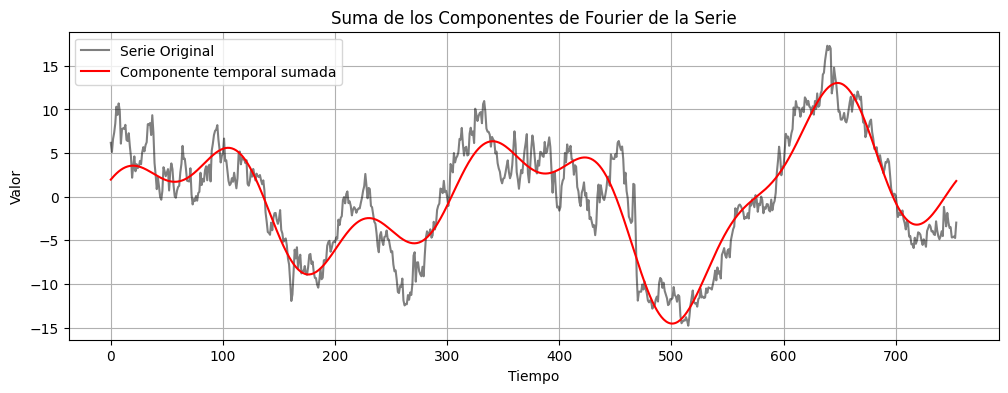

In [ ]:
serie = df['Poly_Resid_KOF'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado

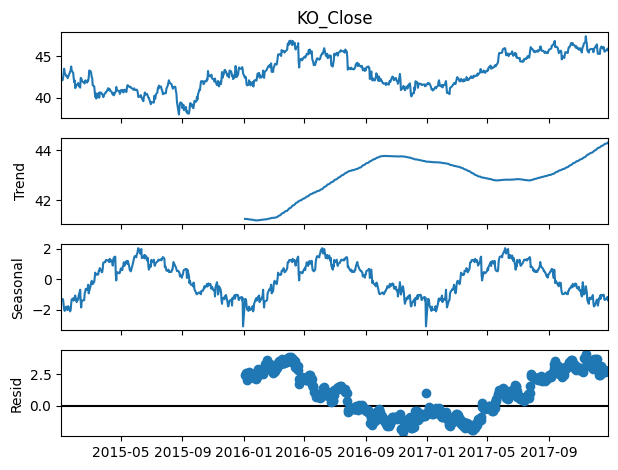

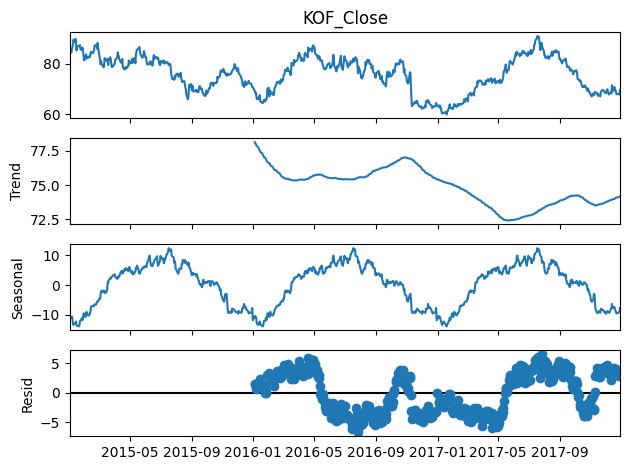

In [ ]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['KO_Close'],
    model='additive',
    period=252,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()



# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['KOF_Close'],
    model='additive',
    period=252,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipotesis nula (H0): La serie tiene una raiz unitaria (no es estacionaria)
#Hipotesis alternativa (H1): La serie es estacionaria
from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

#Realizar la prueba de Dickey-Fuller en lo la tendencia
adf_test = adfuller(descomposicion.resid.dropna())

print('Estadistico ADF:',adf_test[0])
print('P-valor:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print('La tendencia es estacionaria (rechazamos la hipotesis nula)')
else:
    print('La tendencia no es estacionaria (aceptamos la hipotesis nula)')

Estadistico ADF: -2.0725090772631445
P-valor: 0.25571152347185455
La tendencia no es estacionaria (aceptamos la hipotesis nula)


In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipotesis nula (H0): La serie tiene una raiz unitaria (no es estacionaria)
#Hipotesis alternativa (H1): La serie es estacionaria
from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

#Realizar la prueba de Dickey-Fuller en lo la tendencia
adf_test = adfuller(descomposicion.resid.dropna())

print('Estadistico ADF:',adf_test[0])
print('P-valor:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print('La tendencia es estacionaria (rechazamos la hipotesis nula)')
else:
    print('La tendencia no es estacionaria (aceptamos la hipotesis nula)')

Estadistico ADF: -2.0725090772631445
P-valor: 0.25571152347185455
La tendencia no es estacionaria (aceptamos la hipotesis nula)


In [ ]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")

Estadístico t: -0.07522151840380271
Valor p: 0.9400684298242064


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


In [ ]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")

Estadístico t: -0.07522151840380271
Valor p: 0.9400684298242064


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


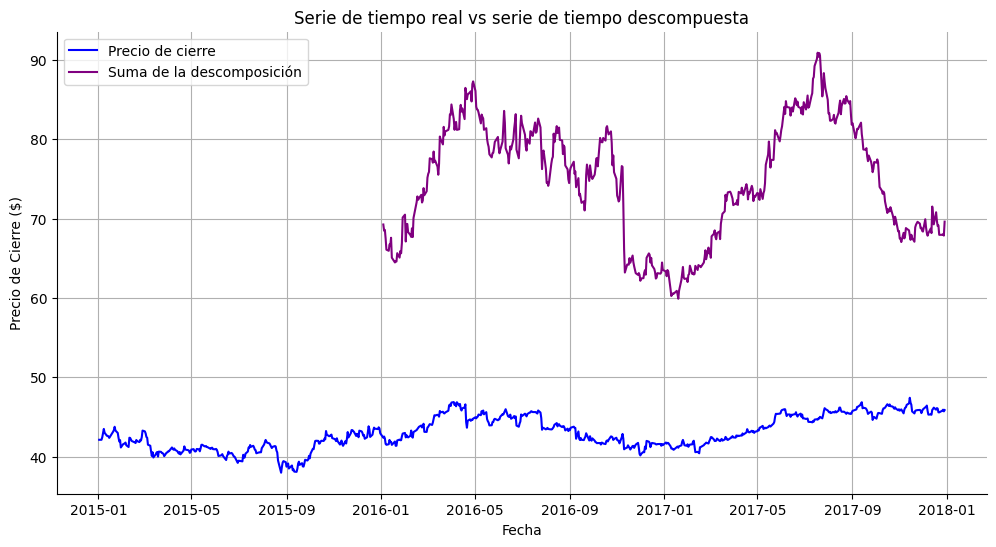

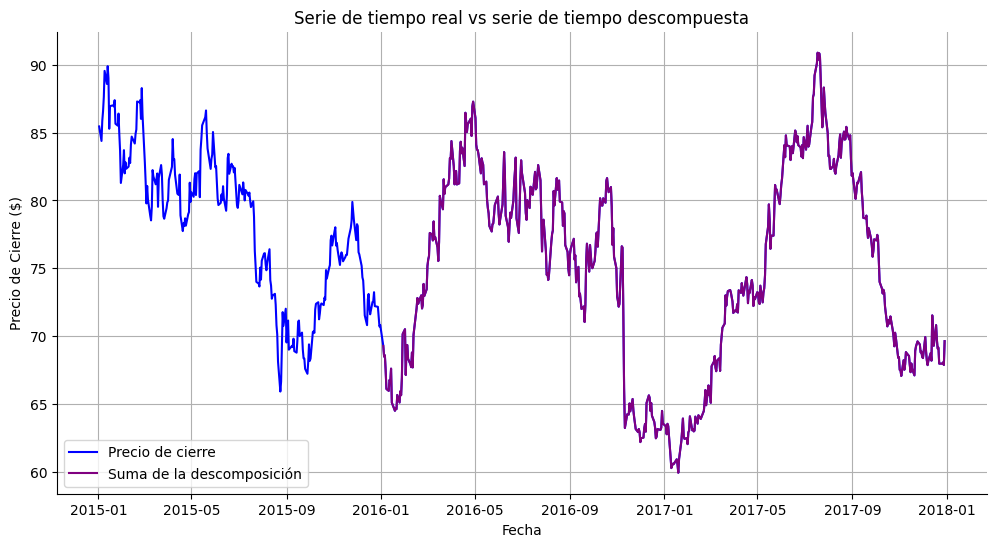

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['KO_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.show()


# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['KOF_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.show()

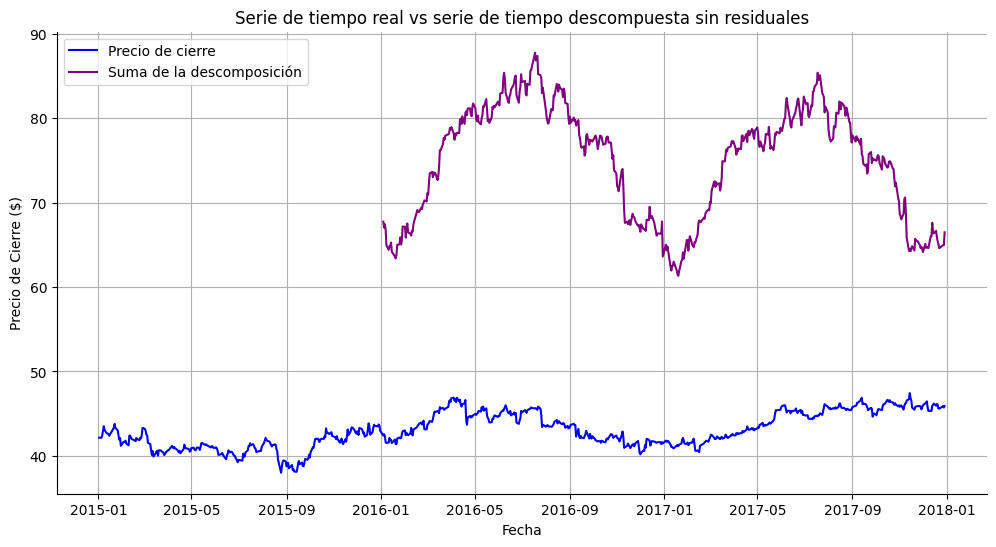

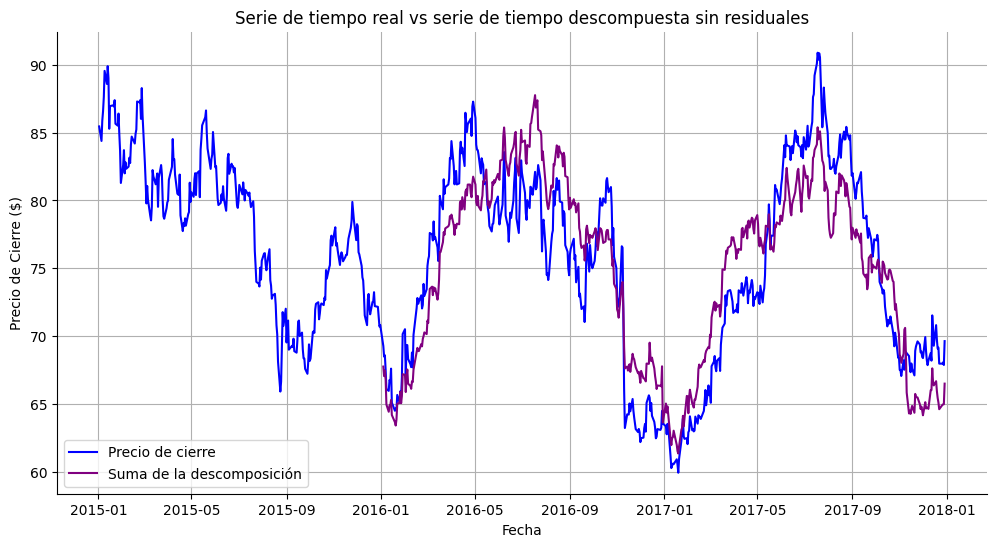

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['KO_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['KOF_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

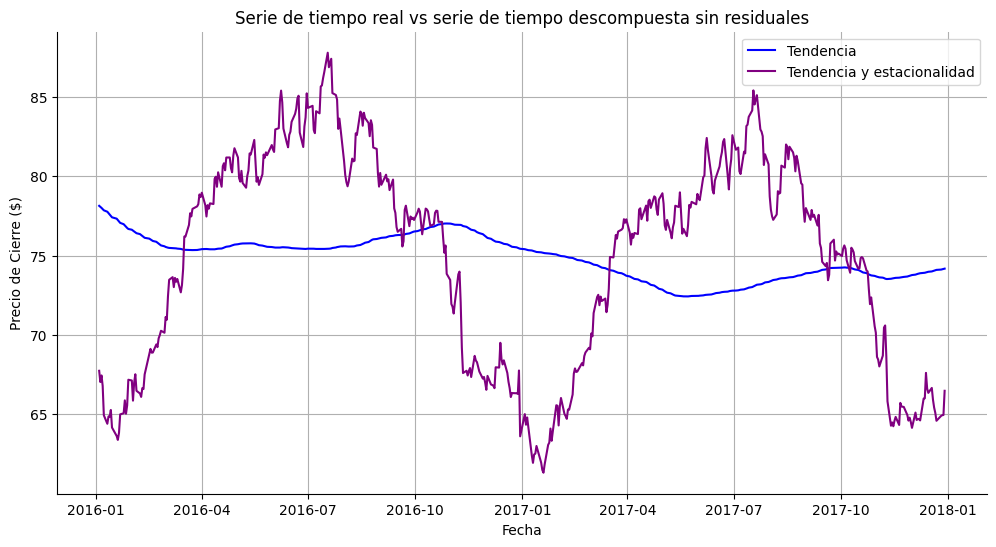

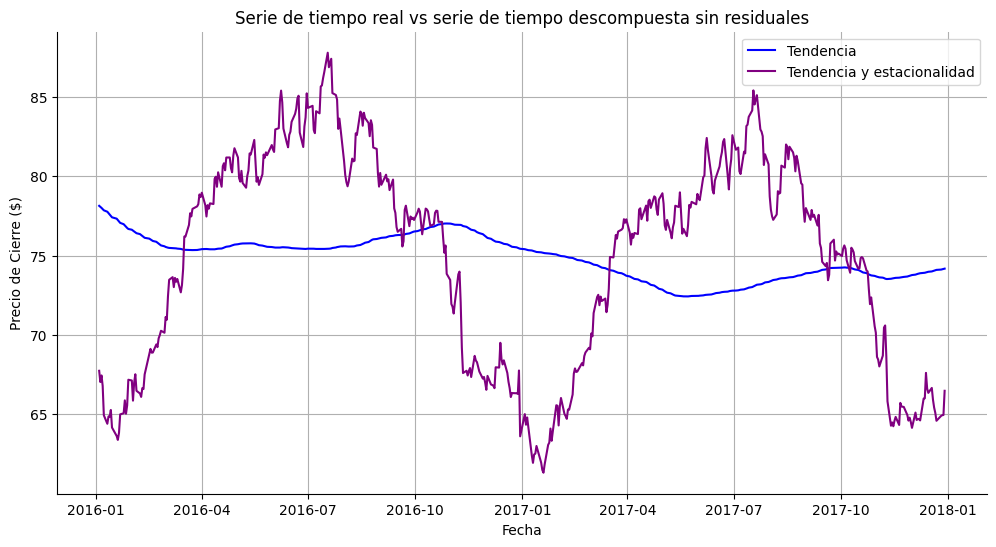

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

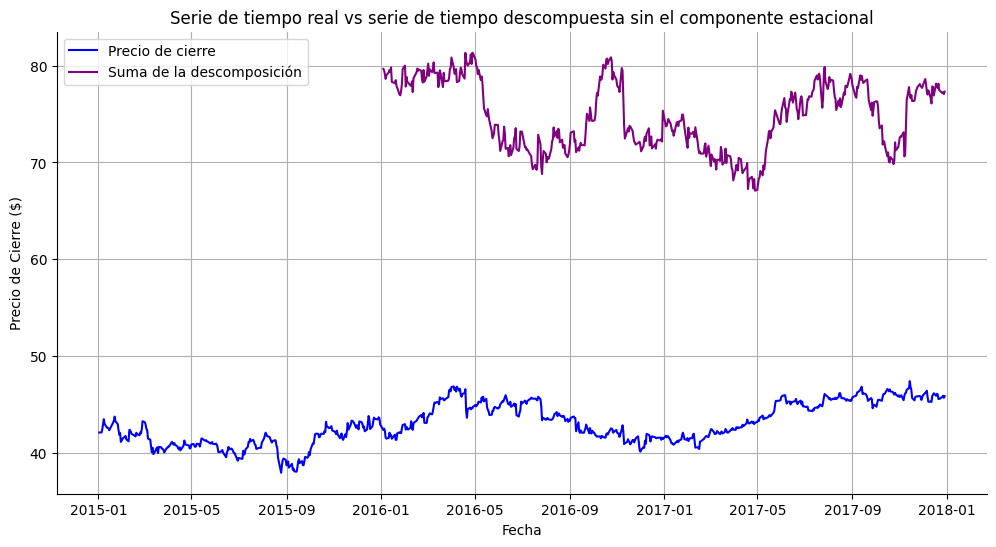

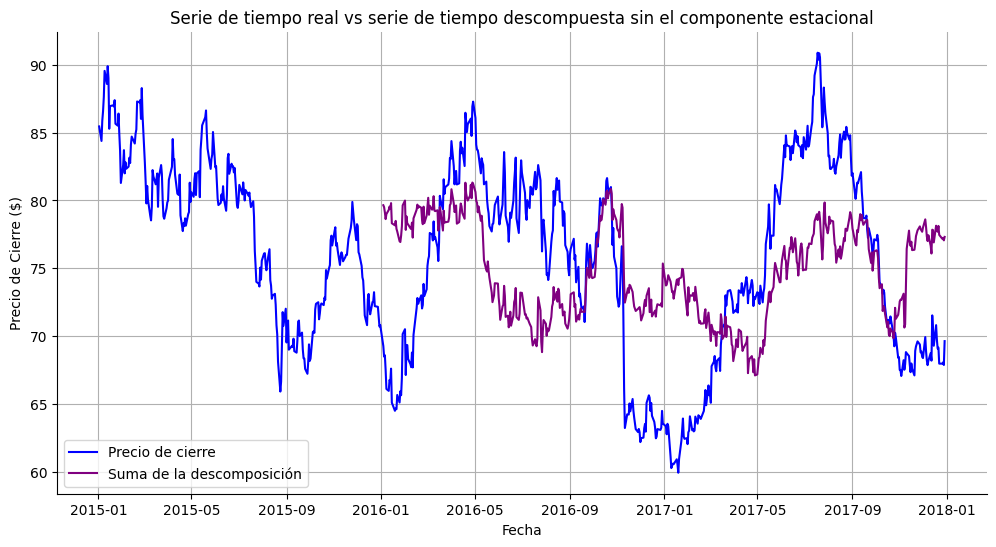

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['KO_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['KOF_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

c) Investiga el concepto de "causalidad de Granger" y aplícalo a las series de tiempo


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 10

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['KO_Close', 'KOF_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2163  , p=0.6420  , df_denom=751, df_num=1
ssr based chi2 test:   chi2=0.2171  , p=0.6412  , df=1
likelihood ratio test: chi2=0.2171  , p=0.6413  , df=1
parameter F test:         F=0.2163  , p=0.6420  , df_denom=751, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4857  , p=0.6155  , df_denom=748, df_num=2
ssr based chi2 test:   chi2=0.9778  , p=0.6133  , df=2
likelihood ratio test: chi2=0.9772  , p=0.6135  , df=2
parameter F test:         F=0.4857  , p=0.6155  , df_denom=748, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8068  , p=0.4903  , df_denom=745, df_num=3
ssr based chi2 test:   chi2=2.4431  , p=0.4857  , df=3
likelihood ratio test: chi2=2.4391  , p=0.4864  , df=3
parameter F test:         F=0.8068  , p=0.4903  , df_denom=745, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6367  , p=0.6365  

d) Investiga la aplicación del modelo "Prophet", sus alcances y limitaciones, y aplícalo a ambas series de tiempo.

In [ ]:
# Este data frame son del siguiente año a df. Esto con el propósito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers=['KO','KOF'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2015-01-01',        # Fecha de inicio
    end='2018-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  2 of 2 completed


,KOF_Open,KOF_High,KOF_Low,KOF_Close,KOF_Adj Close,KOF_Volume,KO_Open,KO_High,KO_Low,KO_Close,KO_Adj Close,KO_Volume
Date,,,,,,,,,,,,
2015-01-02,86.449997,86.449997,85.160004,85.459999,61.184826,83900,42.259998,42.400002,41.799999,42.139999,30.894678,9921100
2015-01-05,85.120003,85.449997,83.019997,84.389999,60.418755,56100,42.689999,42.970001,42.080002,42.139999,30.894678,26292600
2015-01-06,84.690002,86.540001,84.129997,85.870003,61.478352,64200,42.410000,42.939999,42.240002,42.459999,31.129276,16897500
2015-01-07,86.839996,87.669998,85.070000,86.580002,61.986706,61500,42.799999,43.110001,42.580002,42.990002,31.517839,13412300
2015-01-08,87.519997,88.620003,87.169998,87.639999,62.745598,45100,43.180000,43.570000,43.099998,43.509998,31.899076,21743600
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,69.410004,69.589996,67.400002,67.959999,52.394833,66100,45.689999,45.730000,45.549999,45.590000,36.857445,5406300
2017-12-26,68.139999,69.589996,66.580002,67.959999,52.394833,77100,45.700001,45.860001,45.610001,45.810001,37.035309,6100400
2017-12-27,68.250000,68.370003,67.510002,68.050003,52.464226,52100,45.900002,45.939999,45.720001,45.930000,37.132324,5660600


In [ ]:
!pip install prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddh_h_4l/zuambhnx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddh_h_4l/1ycsi2jf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25715', 'data', 'file=/tmp/tmpddh_h_4l/zuambhnx.json', 'init=/tmp/tmpddh_h_4l/1ycsi2jf.json', 'output', 'file=/tmp/tmpddh_h_4l/prophet_modelw0i8zzfa/prophet_model-20241122192509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:25:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:25:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


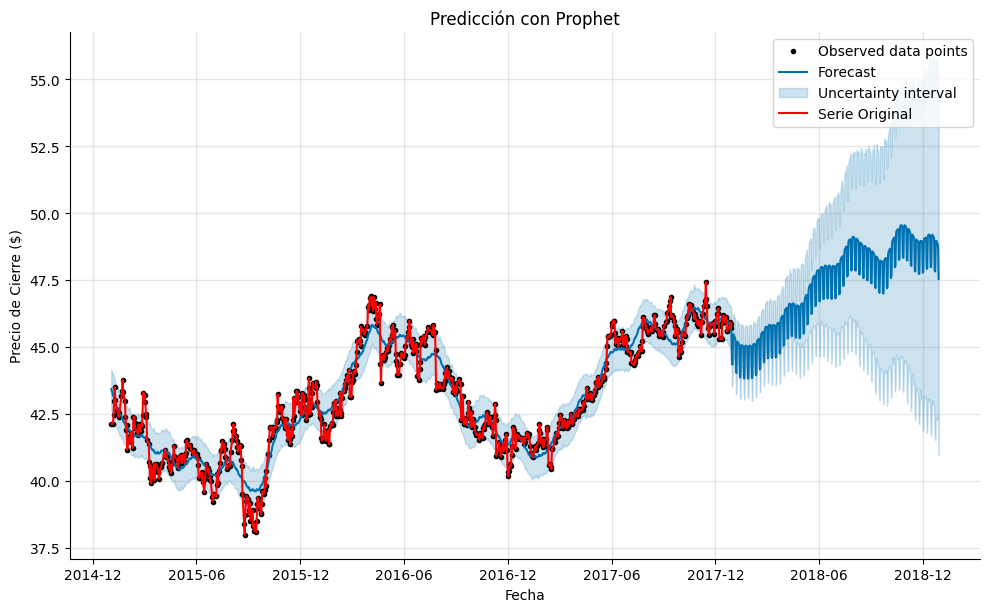

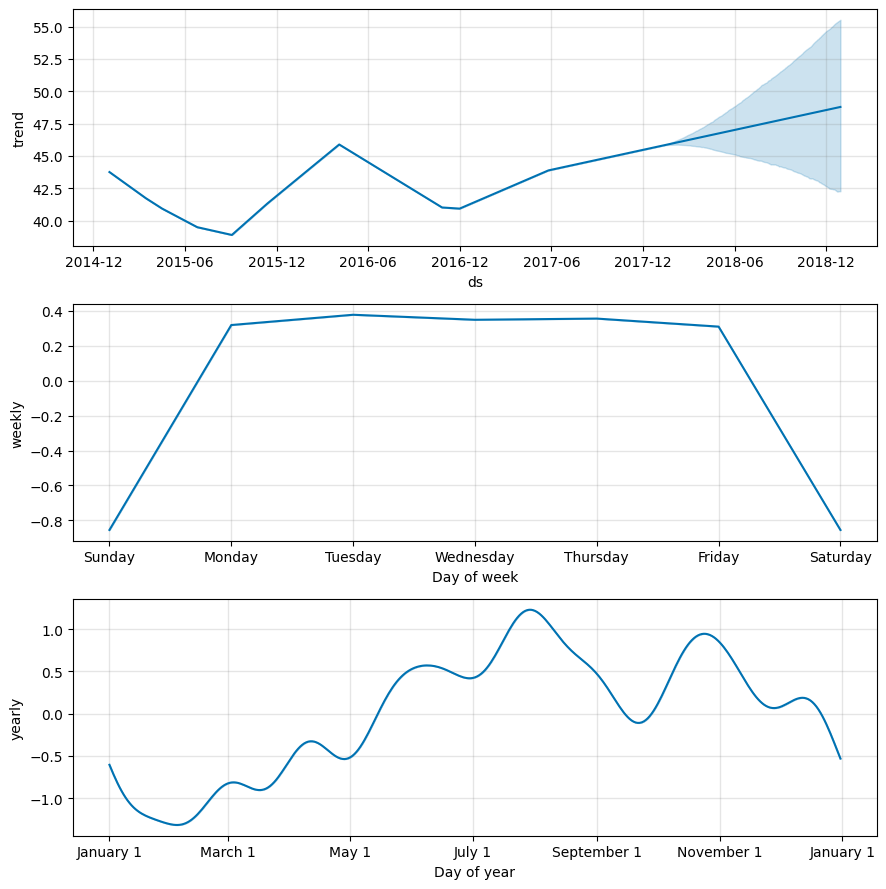

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['KO_Close'].reset_index().rename(columns={'Date': 'ds', 'KO_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['KO_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddh_h_4l/h56l2ng0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddh_h_4l/iz79mmb4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11312', 'data', 'file=/tmp/tmpddh_h_4l/h56l2ng0.json', 'init=/tmp/tmpddh_h_4l/iz79mmb4.json', 'output', 'file=/tmp/tmpddh_h_4l/prophet_modely0exlb51/prophet_model-20241122192511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:25:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:25:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


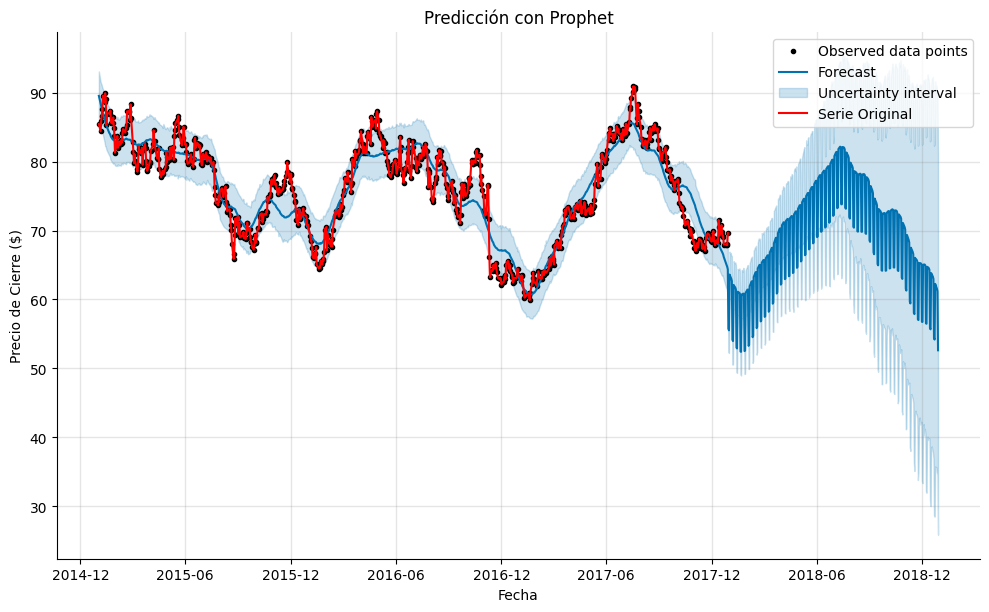

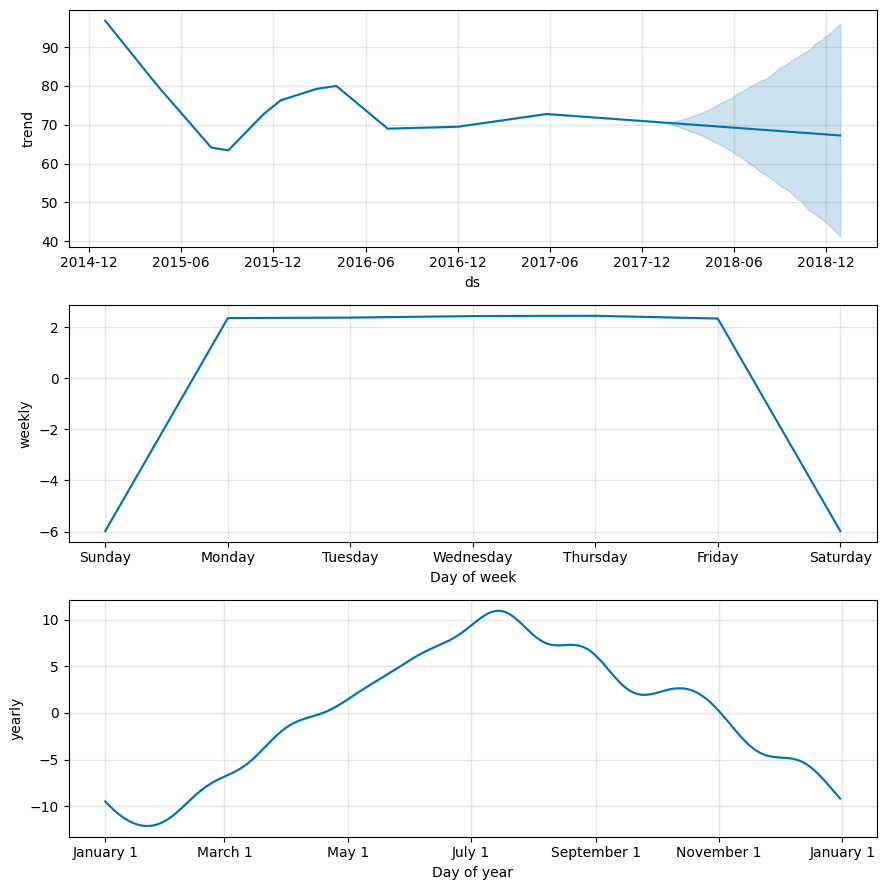

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['KOF_Close'].reset_index().rename(columns={'Date': 'ds', 'KOF_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['KOF_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddh_h_4l/a6u3lixt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddh_h_4l/mxo08etr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58395', 'data', 'file=/tmp/tmpddh_h_4l/a6u3lixt.json', 'init=/tmp/tmpddh_h_4l/mxo08etr.json', 'output', 'file=/tmp/tmpddh_h_4l/prophet_modelrxl072g2/prophet_model-20241122192513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:25:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:25:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


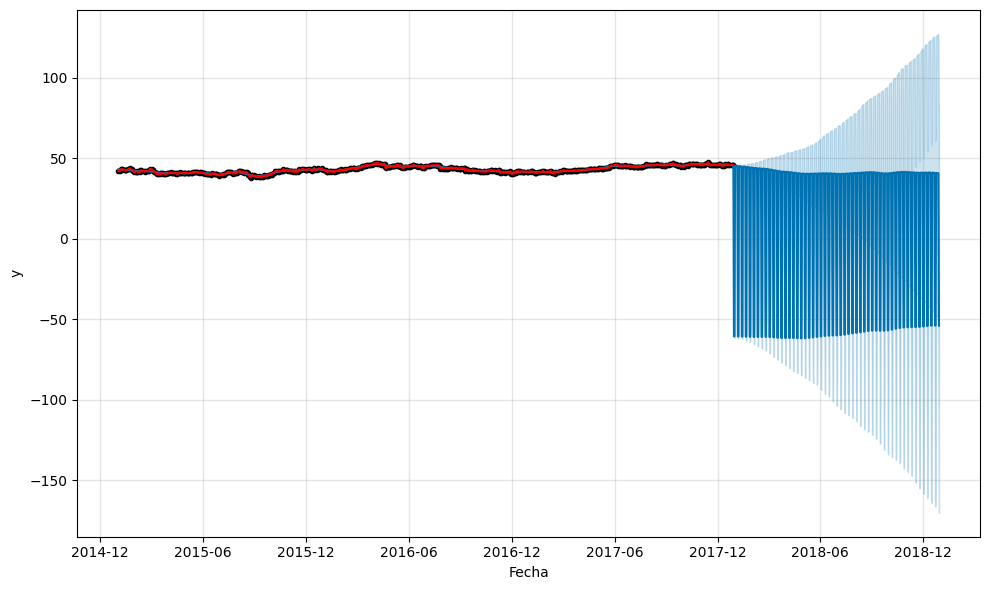

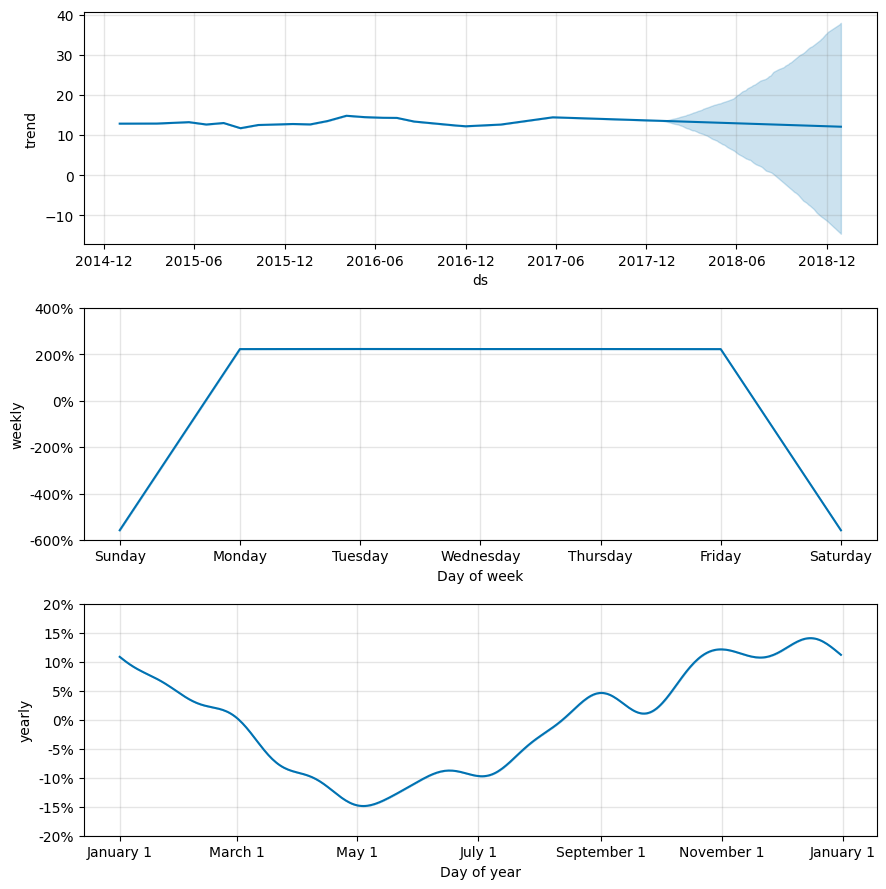

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
# Personalizando el modelo lo arruinamos :(
modelo = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)
modelo.fit(df['KO_Close'].reset_index().rename(columns={'Date': 'ds', 'KO_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['KO_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
fig = modelo.plot_components(predicciones)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddh_h_4l/i58lkk9i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpddh_h_4l/x33zmh7x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=453', 'data', 'file=/tmp/tmpddh_h_4l/i58lkk9i.json', 'init=/tmp/tmpddh_h_4l/x33zmh7x.json', 'output', 'file=/tmp/tmpddh_h_4l/prophet_model1m2c7qdm/prophet_model-20241122192517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:25:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:25:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


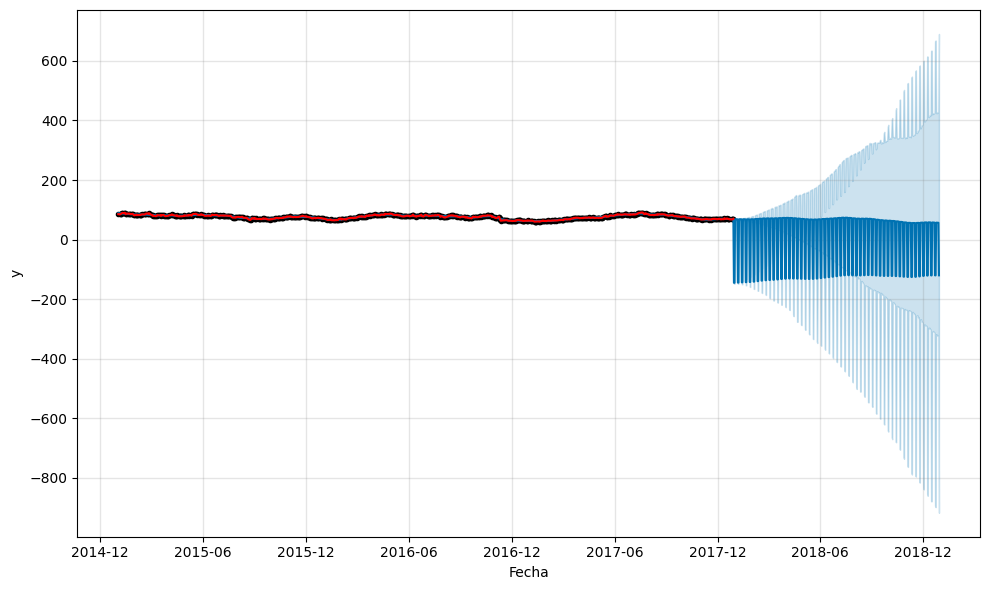

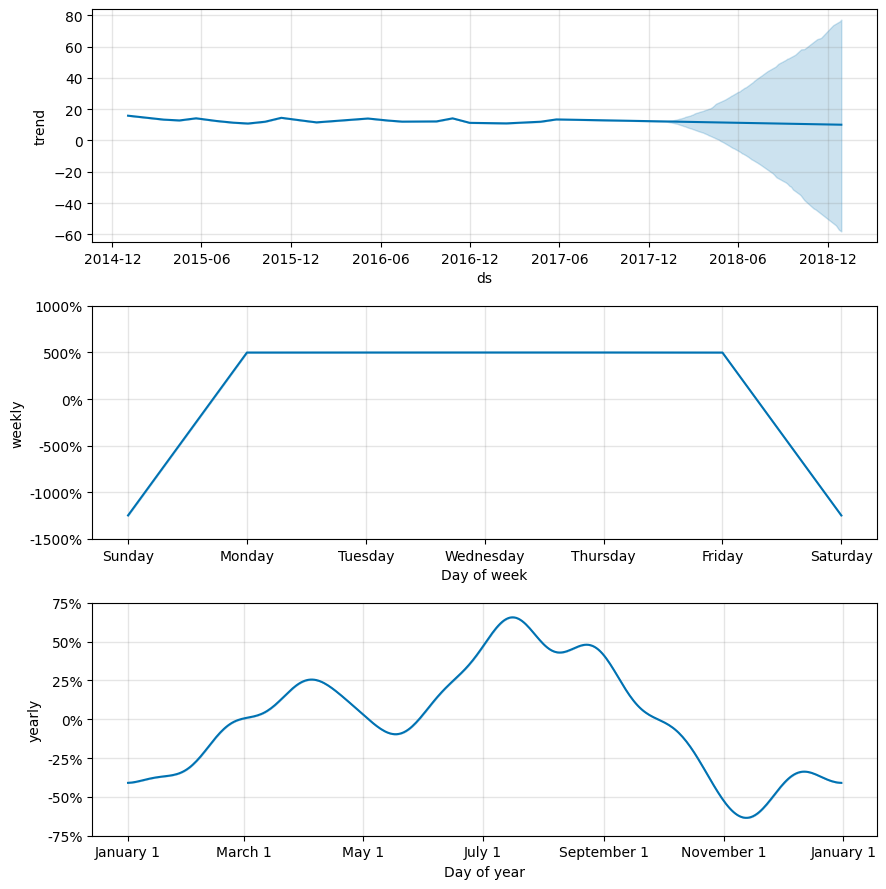

In [ ]:
from prophet import Prophet

# Crear el modelo y ajustarlo
# Personalizando el modelo lo arruinamos :(
modelo = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)
modelo.fit(df['KOF_Close'].reset_index().rename(columns={'Date': 'ds', 'KOF_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['KOF_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
fig = modelo.plot_components(predicciones)



#**INTERPRETACIÓN KO:**
Los resultados del análisis sugieren que la empresa Coca-Cola Company (KO), a nivel de su comportamiento en el mercado financiero, mantiene una trayectoria estable y consistente. Esto es indicativo de la madurez de la compañía como lider a nivel mundial en su sector, así que se puede deducir lo siguiente:
>**-Tendencia general:**
>El precio de Ko muestra un crecimiento sostenido a lo largo del tiempo, tomando en cuenta esos tres años, con fluctuaciones menores provocadas popr diversos factores. Esto refleja la percepción de estabilidad por parte de los inversionistas, probablemente debido a su liderazgo en el mercado, la diversificación de productos una estrategia imprescindible de Marketing.

>**-Estacionalidad:**
>Por su lado los patrones estacionales son poco pronunciados, lo que puede sugerir que la demanda d elos productos y el rendimiento financiero de la empresa son relativamente constantes durante todo el año. Es una de las marcas que se clasifica de consumo básico, ahí la razón.

>**-Predicción de Prophet:**
>Las proyecciones de KO sugieren una tendencia estable, lo que es alentador para los inversionistas que buscan bajo riesgo, es uan opción sumamente factible.

>**-Relación con KOF**
>Aunque ambas marcas trabajan operativamente hablando, y tomando en cuenta que KOF es la emotelladora, no casusa un efecto significativo en la empresa KOF, es decir, KOF no depende de que tanto venda o no KO.

#**INTERPRETACIÓN KOF:**
En contraste, Coca-Cola FEMSA (KOF) presenta un comportamiento financiero más volátil y expuesto a factores externos.  Esto puede explicarse por su rol operativo y las condiciones específicas de los mercados donde opera. Los resultados muestran:
>-**Tendencia general**
>KOF de igual manera muestra un crecimiento, las fluctuaciones en sus precios son más marcadas, lo que indica una mayor sensibilidad a factores económicos.

>**Estacionalidad y variabilidad:**
>Comparando KOF presenta un componente estacional más notable que KO, se puede asociar con las variaciones en la demanda estacional de bebidas. Esto sugiere que su desempeño financiero está más ligado a ciclos de consumo específicos y eventos locales.

>**Predicción de Prophet:**
>Las predicciones de KOF muestran un rango de incertidumbre mayor en comparación con KO, reflejando la naturaleza más impredecible de sus operaciones.

>**Relación con KO:**
>Aunque KOF depende de KO como su principal proveedor de concentrado, los precios de sus acciones no están directamente sincronizados. Esto puede deberse a diferencias en la estructura de costos, la exposición al mercado y las estrategias de crecimiento.

# **CONCLUSIÓN:**
Tomando en cuenta los resultados del analisis, podemos deducir que Coca-Cola Comapny (KO) es un lugar más seguro y estable para los inversionistas, ya que, es un mercado más estable, sin embargo, FEMSA (KO) es más afectado por los diversos factores externos económicos.
A pesar de que las acciones no reflejen alguna dependencia, KOF depende de su mayor proveedor KOF, de esta manera es como se relacionan.

La estabilidad de KO y la mayor variabilidad de KOF reflejan las diferencias en sus modelos de negocio:

KO es una marca global diversificada que opera con bajos riesgos en mercados maduros.
KOF, aunque vinculada a KO, opera en mercados regionales con mayor exposición a riesgos económicos y fluctuaciones locales.
Estos resultados refuerzan la idea de que KO es una inversión más segura y estable, mientras que KOF puede representar una oportunidad más arriesgada, pero con potencial de mayores retornos en mercados específicos.